# Land Rail Transit 1 (LRT-1) Monthly Passenger Traffic (2014)

The Manila Light Rail Transit System Line 1 is the first metro line of the Manila Light Rail Transit System. Presently, the line contains twenty stations and runs on 19.65 kilometers (12.21 mi) of fully elevated route. The line is colored yellow (old) and green (new) on all railway maps. 
  
The line runs in a general north-south direction from Baclaran to Monumento; then, it runs in an east-west direction from Monumento to North Avenue, linking the cities of Quezon City, Caloocan, Manila, Pasay, and Parañaque. Passengers can transfer to the Line 2 at Doroteo Jose station, while passengers can transfer to the Line 3 at EDSA station and in the future at North Avenue station.

The Line 1 was known for many names such as LRT Line 1, shortened to LRT-1, Yellow Line, Green Line (2012), or the Metrorail. However, the yellow color of the line dates back to its opening in 1984.



![](http://mapa-metro.com/mapas/Manila/800-mapa-metro-manila2.png)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='whitegrid')


df = pd.read_csv('lrt_passenger_traffic.csv')
df.head()

,station,movement,month,count_traffic
0,Baclaran,Entry,january,1097101
1,Baclaran,Exit,january,1002761
2,EDSA,Entry,january,1845206
3,EDSA,Exit,january,1971205
4,Libertad,Entry,january,421298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
station          480 non-null object
movement         480 non-null object
month            480 non-null object
count_traffic    480 non-null int64
dtypes: int64(1), object(3)
memory usage: 15.1+ KB


In [4]:
df.isna().sum()

station          0
movement         0
month            0
count_traffic    0
dtype: int64

In [5]:
df_entry = df[df.movement=='Entry']
df_exit = df[df.movement=='Exit']


# Which station most passengers ride the most?

![](https://sa.kapamilya.com/absnews/abscbnnews/media/2018/news/05/22/20171204-lrt-train-gc-002.jpg)

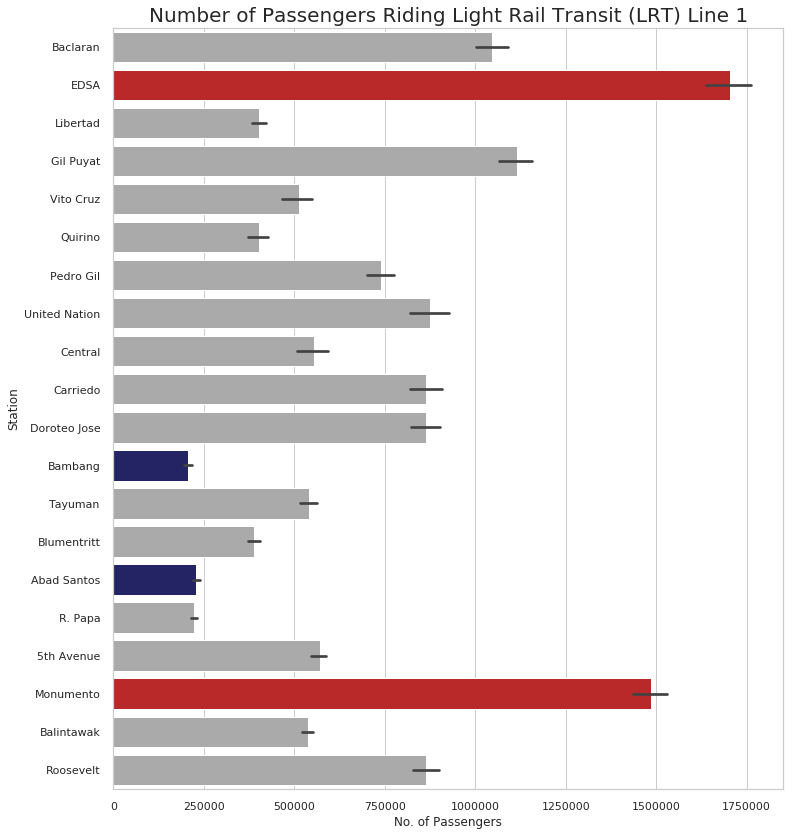

In [6]:
colors = ["#aaaaaa", "#d11111", "#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa", "#191970", "#aaaaaa","#aaaaaa","#191970","#aaaaaa","#aaaaaa","#d11111","#aaaaaa","#aaaaaa"]
fig, ax = plt.subplots(figsize=(12,14))
sns.barplot(y='station',x='count_traffic',data=df_entry, palette=colors);
plt.title('Number of Passengers Riding Light Rail Transit (LRT) Line 1', fontsize=20);
plt.xlabel('No. of Passengers', fontsize=12);
plt.ylabel('Station', fontsize=12);


# Which station is dropping the most passenger ?

![](https://sa.kapamilya.com/absnews/abscbnnews/media/2017/news/08/31/20170206-lrt-station-jc6.jpg)


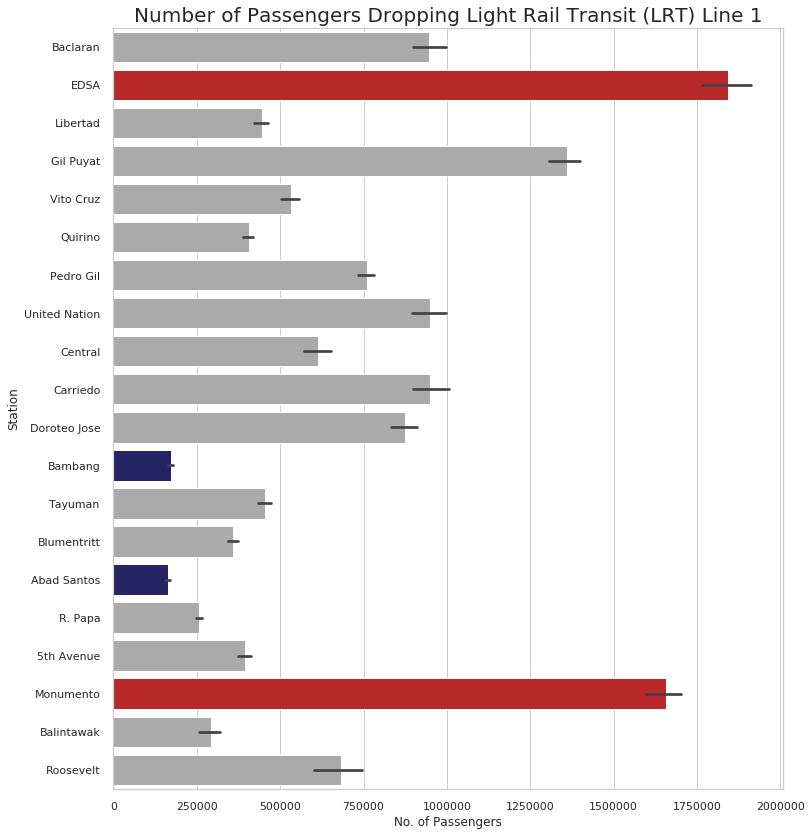

In [7]:
colors = ["#aaaaaa", "#d11111", "#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa", "#191970", "#aaaaaa","#aaaaaa","#191970","#aaaaaa","#aaaaaa","#d11111","#aaaaaa","#aaaaaa"]
fig, ax = plt.subplots(figsize=(12,14))
sns.barplot(y='station',x='count_traffic',data=df_exit,palette=colors);
plt.title('Number of Passengers Dropping Light Rail Transit (LRT) Line 1', fontsize=20);
plt.xlabel('No. of Passengers', fontsize=12);
plt.ylabel('Station', fontsize=12);


# Summary

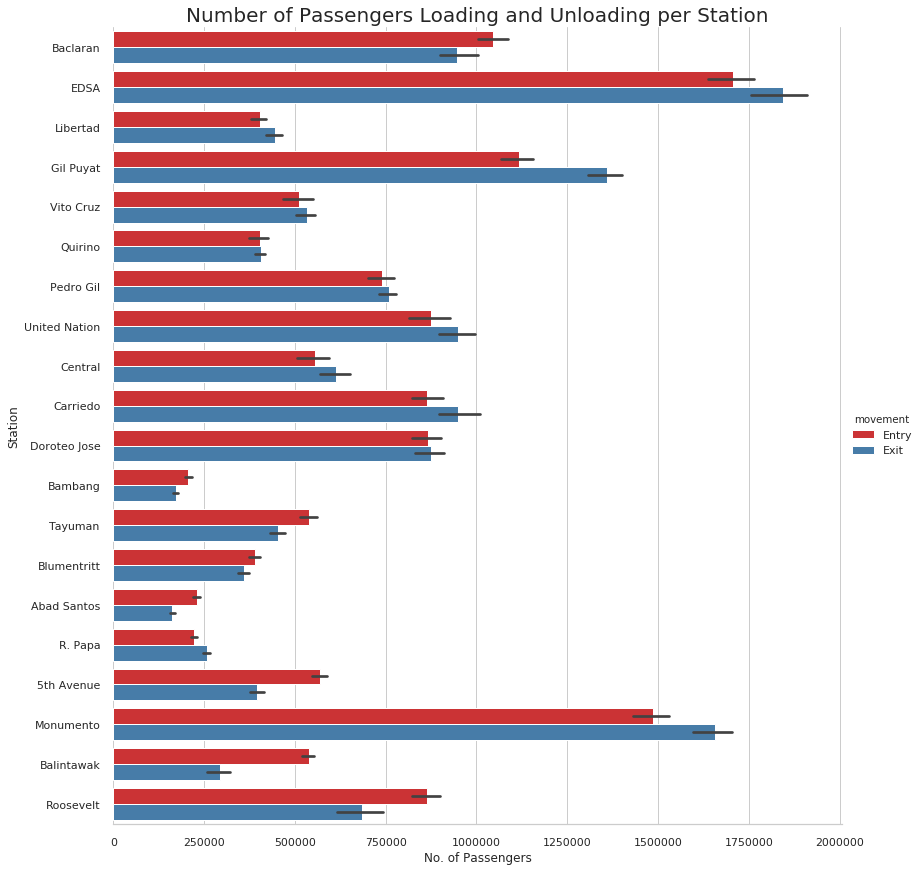

In [8]:
g = sns.catplot(x="count_traffic", y="station", hue="movement", data=df, height=12, kind="bar", palette="Set1",aspect=1, ci=95)
g.despine(left=True)
plt.title('Number of Passengers Loading and Unloading per Station', fontsize=20);
plt.xlabel('No. of Passengers', fontsize=12);
plt.ylabel('Station', fontsize=12);

# From what month do passengers ride LRT line 1 the most?

In [9]:
df.groupby('month').count_traffic.sum().sort_values(ascending=False)

month
january      30620026
october      30410802
august       29339951
november     29265221
march        29257532
september    28967590
july         28518533
december     28391236
february     28110084
june         27164405
may          25859425
april        22970960
Name: count_traffic, dtype: int64

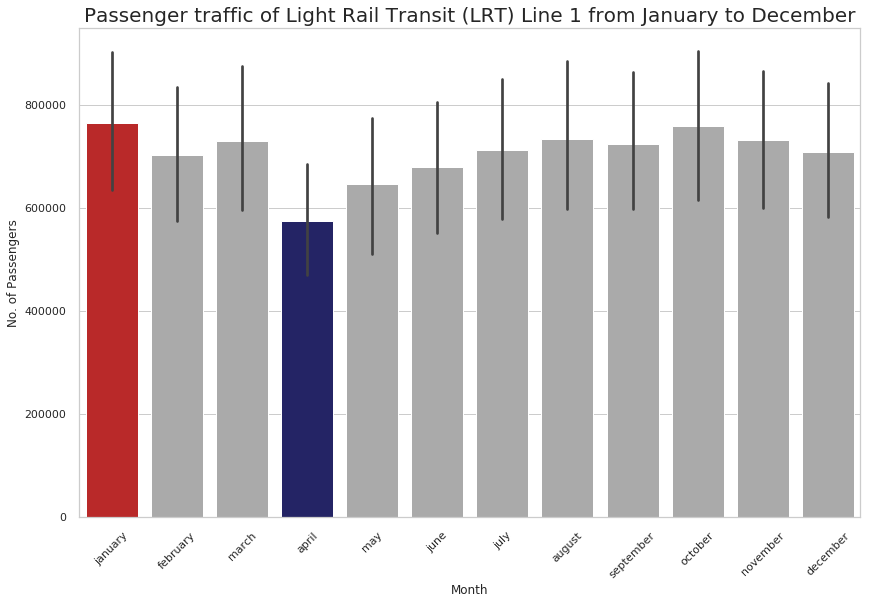

In [12]:
colors = ["#d11111", "#aaaaaa", "#aaaaaa","#191970","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa","#aaaaaa", "#aaaaaa"]
fig, ax = plt.subplots(figsize=(14,9))
sns.barplot(x='month',y='count_traffic',data=df, palette=colors);
plt.title('Passenger traffic of Light Rail Transit (LRT) Line 1 from January to December', fontsize=20);
plt.xlabel('Month', fontsize=12);
plt.ylabel('No. of Passengers', fontsize=12);
plt.xticks(rotation=45);